# 1. Install Dependencies and Setup

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [44 lines of output]
      Traceback (most recent call last):
        File "C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\setuptools\_vendor\packaging\requirements.py", line 35, in __init__
          parsed = _parse_requirement(requirement_string)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 64, in parse_requirement
          return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 82, in _parse_requirement
          url, specifier, marker = _parse_requirement_details(tokenizer)
       

In [2]:
!pip list

Package                   Version
------------------------- -----------
absl-py                   2.1.0
altair                    5.3.0
annotated-types           0.7.0
appdirs                   1.4.4
asttokens                 2.4.1
astunparse                1.6.3
attrs                     23.2.0
blinker                   1.8.2
blis                      0.7.11
cachetools                5.3.3
catalogue                 2.0.10
certifi                   2024.6.2
charset-normalizer        3.3.2
click                     8.1.7
cloudpathlib              0.18.1
cmake                     3.29.5.1
colorama                  0.4.6
comm                      0.2.2
confection                0.1.5
contourpy                 1.2.1
cycler                    0.12.1
cymem                     2.0.8
debugpy                   1.8.2
decorator                 5.1.1
en-core-web-sm            3.7.1
executing                 2.0.1
Flask                     3.0.3
Flask-Cors                4.0.1
flatbuffers          

In [3]:
import tensorflow as tf
import os

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [6]:
import cv2
import imghdr

C:\Users\DELL\AppData\Local\Temp\ipykernel_4732\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [7]:
#data_dir = 'LetsLearnGit/wallpaper' 

In [10]:
data_dir='LetsLearnGit'
os.listdir(os.path.join(data_dir ,'wallpaper'))

['360_F_521225307_reMVJcTBuXkMskVvy98jVCWHOPDaJRX3.jpg',
 '360_F_547769482_sKqPdN0tSmfRHZTA6s6OvGsDzJbU9WPQ.jpg',
 '360_F_547978128_vqEEUYBr1vcAwfRAqReZXTYtyawpgLcC.jpg',
 '360_F_633365317_BP3fkR7TgfrS39j18D4r8vZ0D3KYy98h.jpg',
 '360_F_680358031_rZ3bhwlPeEe081utZAkERT1Q7iUgqiml.jpg',
 '3d-nature-wallpaper-500x500.jpg',
 '3d-waterfall-nature-wallpaper-250x250.jpg',
 'AF2bZyjvQYCW0shnzXzRhCZsTxAifxiDeECFtfnS2rv-T4z4IAks64-c-mo.jpg',
 'hills-2836301_640.jpg',
 'image.jpeg',
 'image10.jpeg',
 'image11.jpeg',
 'image12.jpeg',
 'image13.jpeg',
 'image14.jpeg',
 'image15.jpeg',
 'image16.jpeg',
 'image17.jpeg',
 'image18.jpeg',
 'image19.jpeg',
 'image2.jpeg',
 'image20.jpeg',
 'image21.jpeg',
 'image22.jpeg',
 'image23.jpeg',
 'image24.jpeg',
 'image25.jpeg',
 'image26.jpeg',
 'image27.jpeg',
 'image28.jpeg',
 'image29.jpeg',
 'image3.jpeg',
 'image30.jpeg',
 'image31.jpeg',
 'image32.jpeg',
 'image33.jpeg',
 'image34.jpeg',
 'image35.jpeg',
 'image36.jpeg',
 'image37.jpeg',
 'image38.jpeg',

In [11]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [12]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [13]:
import numpy as np
from matplotlib import pyplot as plt

In [16]:
data = tf.keras.utils.image_dataset_from_directory('LetsLearnGit')

Found 64 files belonging to 1 classes.


In [17]:
data_iterator = data.as_numpy_iterator()

In [18]:
batch = data_iterator.next()

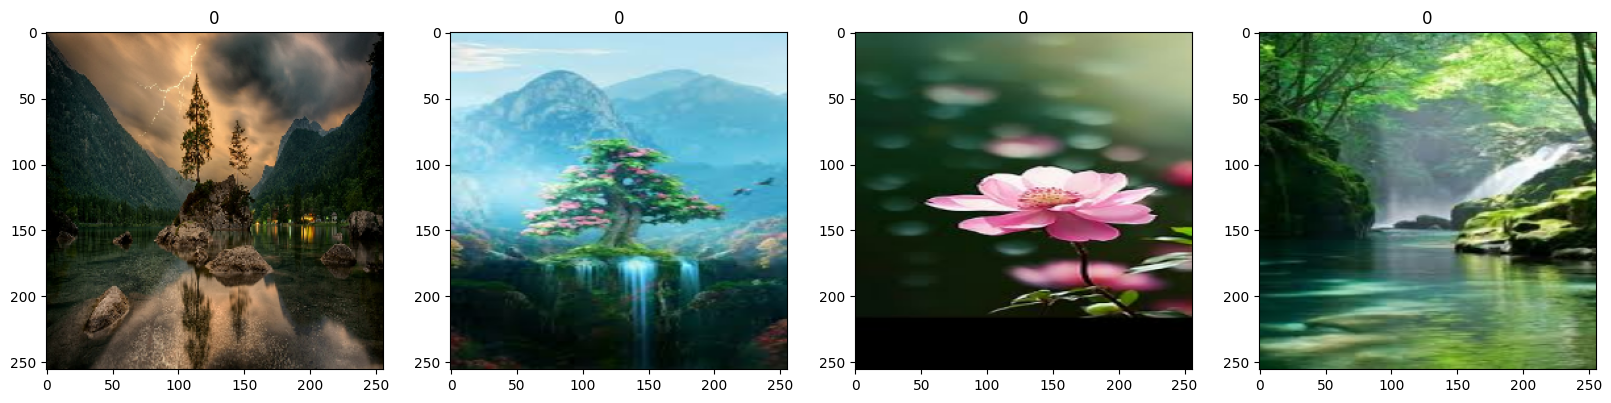

In [19]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [20]:
data = data.map(lambda x,y: (x/255, y))

In [21]:
data.as_numpy_iterator().next()

(array([[[[6.44301474e-02, 2.56586999e-01, 3.85998785e-01],
          [4.84178737e-02, 2.35365927e-01, 3.64777684e-01],
          [4.22597863e-02, 2.22969323e-01, 3.52381080e-01],
          ...,
          [3.40736538e-01, 4.21312511e-01, 5.41945279e-01],
          [3.33251476e-01, 4.14930403e-01, 5.36162019e-01],
          [3.27389717e-01, 4.09068614e-01, 5.30300260e-01]],
 
         [[7.93198496e-02, 2.72487760e-01, 4.03921574e-01],
          [5.60953766e-02, 2.48773545e-01, 3.79227936e-01],
          [3.96101400e-02, 2.29561120e-01, 3.58972877e-01],
          ...,
          [3.30392152e-01, 3.99897069e-01, 5.15430152e-01],
          [3.19546580e-01, 3.90012264e-01, 5.06648302e-01],
          [3.11948538e-01, 3.82414222e-01, 4.99050260e-01]],
 
         [[8.23835805e-02, 2.78462023e-01, 4.15716916e-01],
          [5.93075007e-02, 2.54302621e-01, 3.89390886e-01],
          [3.73362824e-02, 2.28972316e-01, 3.61517221e-01],
          ...,
          [3.75790358e-01, 4.29244220e-01, 5.3728

# 5. Split Data

In [22]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [23]:
train_size

1

In [24]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [25]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [27]:
model = Sequential()

In [28]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# 7. Train

In [31]:
logdir='logs'

In [32]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [33]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7500 - loss: 0.6637

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


AttributeError: 'NoneType' object has no attribute 'items'

# 8. Plot Performance

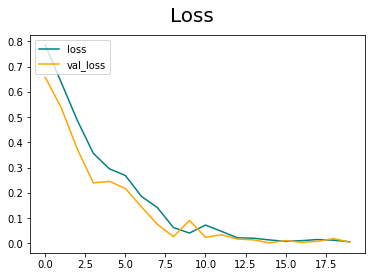

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

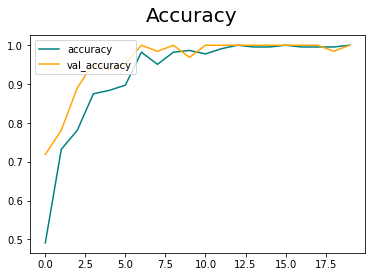

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [ ]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [ ]:
import cv2

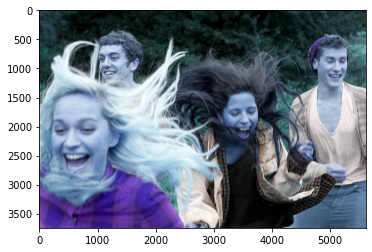

In [ ]:
img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()

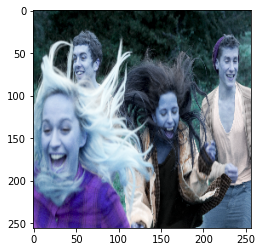

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

In [ ]:
yhat

array([[0.01972741]], dtype=float32)

In [ ]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# 11. Save the Model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','imageclassifier.h5'))

In [ ]:
new_model = load_model('imageclassifier.h5')

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))

array([[0.01972741]], dtype=float32)